# Loading Data Into Tensors

Authors: Matthew Gilley, John Morgan, and Nicolas Null<br>
Written in Fall 2021
<hr>

The data we will be using for this project was provided to us by Dr. Ryan Lynch, an astronomer at the Green Bank Observatory. During the summer of 2021, students labeled some screenshots in a database. The goal is to use the labeled screenshots to create a Convolutional Neural Network to label the rest of the screenshots. Their are two types of plots, noise and RFI (Radio Frequency Interference). Though the RFI plots can be broken into multiple subcategories, the purpose of this project is to sort into the aforementioned categories. Here are examples of the screenshots:

Example Noise Screenshot:<br>
<img src="./notebook_images/noise.png" style="height:200px" /><br>

Example RFI Screenshot:<br>
<img src="./notebook_images/rfi.png" style="height:200px" /><br>

The goal of this notebook is to load these screenshots into tensors containing both the image and the label. Then, we will save the tensors so we can load the data easily into other notebooks.

### Importing Libraries
Let us start by importing all the required libraries.

In [10]:
import torch
from torchvision import datasets, transforms
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm

### Getting Current Working Directory
The following code gets the master directory or the directory above the source code directory. This will make it easier to access the screenshots which are located in a separate directory.


In [11]:
master_directory = os.path.dirname(os.getcwd())
master_directory

'c:\\DIP-Project\\DIP-Project'

### Creating Unified Format of Screenshots and Creating Dataset
Though the screenshots appear to be of the same format, they are of slightly different sizes. We need to make sure all data points have the same size. Using transforms, we will create the standard size for the screenshots. This is also where we will turn the images to grayscale. We must also convert them to tensors so we can use them as inputs into our neural network. Using the ImageFolder method, the screenshots will be labeled based on the name of the directory they are located in.
 

In [12]:
transform = transforms.Compose([transforms.Grayscale(), transforms.Resize((256, 256)), transforms.ToTensor()])
dataset = datasets.ImageFolder(os.path.join(master_directory, "Cropped_Screenshots"), transform=transform)
dataset

Dataset ImageFolder
    Number of datapoints: 6013
    Root location: c:\DIP-Project\DIP-Project\Cropped_Screenshots
    StandardTransform
Transform: Compose(
               Grayscale(num_output_channels=1)
               Resize(size=(256, 256), interpolation=bilinear)
               ToTensor()
           )

### Splitting Dataset Into Train, Validate, and Test Sets
Now we will split the dataset into train, test and validate Datasets. The random_split() function will randomly select images from the whole dataset. We need to split the data into these three subsets so they each have unique data. The training set is the actual dataset used to train the model. The validation set is used to evaluate the model after each epoch of training updating and fine tuning the hyperparameters of the model. The test set is used after training is completely finished to see how the model created will perform on unseen data. For a more detailed explanation see <a href="https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7">this article by towardsdatascience.com</a>. 
<br><hr>
Illustration of Train, Validate, Test Split
<br><a src="https://www.brainstobytes.com/test-training-and-validation-sets/">Source</a> 
<br><br>
<img src="notebook_images/train_validate_test.png" style="allign:center">

In [13]:
print("Size of total Dataset",len(dataset))

# create percentage breakdown for each set
percent_train = 0.6
percent_validate = 0.2
percent_test = 0.2

# create the total size of each dataset
train_size = int(percent_train * len(dataset))
validate_size = int(percent_validate * len(dataset)) + 1
test_size = int(percent_test * len(dataset)) + 1

print(train_size+test_size+validate_size)

# create train, validate and test datasets
train_set, validate_set, test_set = torch.utils.data.random_split(dataset, [train_size, validate_size, test_size])
print("Size of Train Dataset",len(train_set))
print("Size of Validate Dataset",len(validate_set))
print("Size of Test Dataset",len(test_set))

Size of total Dataset 6013
6013
Size of Train Dataset 3607
Size of Validate Dataset 1203
Size of Test Dataset 1203


### Create Dataloaders for each Dataset
The dataloader structure allows us to put the dataset into batches (smaller testing sets) and also further shuffles the data within each dataset. It is important to allow small batch sizes so that both the model and that number of screenshots can be loaded onto the GPU at once. A higher batch size will allow for lower overhead of transferring data back and forth from cpu to the gpu, however it must be kept in mind how many screenshots the gpu used can handle at one time.


In [14]:
train_dataloader = torch.utils.data.DataLoader(train_set, batch_size=16, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_set, batch_size=16, shuffle=True)
validate_dataloader = torch.utils.data.DataLoader(validate_set, batch_size=16, shuffle=True)

### Verifying Correctness of Each Dataloader
We can now test out our iterate through our dataloader to see if it works. You can turn dataloader into an iterator and then call the next function to get the next batch. Images and Labels will contain an array of the data from the current batch. To show how the dataloader stores our data, displayed is one noise (class 0) labeled picture and one RFI (class 1) labeled picture.

We'll further verify that each dataloader contains both noise and RFI.

### Verifying Training Dataloader

<ipython-input-21-db050c6a2e5f>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_subplot(1,2,2)


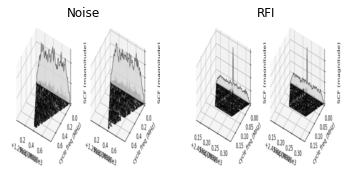

In [21]:
images, labels = next(iter(train_dataloader))
noise = True
rfi = True
fig = plt.figure()
fig.add_subplot(1,2, 1)
for i in range(labels.shape[0]):
    if(noise and labels[i] == 0):
        plt.imshow(images[i].squeeze(), cmap = cm.gray)
        plt.title('Noise')
        plt.axis('off')
        fig.add_subplot(1,2,2)
        noise = False
    elif(rfi and labels[i] == 1):
        plt.imshow(images[i].squeeze(), cmap = cm.gray)
        plt.title('RFI')
        plt.axis('off')
        fig.add_subplot(1,2,2)
        rfi = False

### Verifying Validate Dataloader

<ipython-input-16-dd068b63dace>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_subplot(1,2,2)


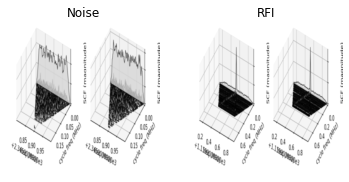

In [16]:
images, labels = next(iter(validate_dataloader))
noise = True
rfi = True
fig = plt.figure()
fig.add_subplot(1,2, 1)
for i in range(labels.shape[0]):
    if(noise and labels[i] == 0):
        plt.imshow(images[i].squeeze(), cmap = cm.gray)
        plt.title('Noise')
        plt.axis('off')
        fig.add_subplot(1,2,2)
        noise = False
    elif(rfi and labels[i] == 1):
        plt.imshow(images[i].squeeze(), cmap = cm.gray)
        plt.title('RFI')
        plt.axis('off')
        fig.add_subplot(1,2,2)
        rfi = False

### Verifying Test Dataloader

<ipython-input-17-f58d0dcf38a5>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_subplot(1,2,2)


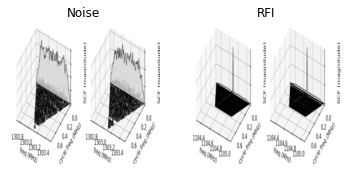

In [17]:
images, labels = next(iter(test_dataloader))
noise = True
rfi = True
fig = plt.figure()
fig.add_subplot(1,2, 1)
for i in range(labels.shape[0]):
    if(noise and labels[i] == 0):
        plt.imshow(images[i].squeeze(), cmap = cm.gray)
        plt.title('Noise')
        plt.axis('off')
        fig.add_subplot(1,2,2)
        noise = False
    elif(rfi and labels[i] == 1):
        plt.imshow(images[i].squeeze(), cmap = cm.gray)
        plt.title('RFI')
        plt.axis('off')
        fig.add_subplot(1,2,2)
        rfi = False

### Saving Dataloaders Using Pickle
Now we'll save the three dataloaders into pickle files so we can import the same exact datasets into various networks for direct comparison.

In [18]:
import pickle
import gzip

with gzip.open('train_cropped_dataloader.pkl', 'w', compresslevel=5) as output:
    pickle.dump(train_dataloader, output, protocol=pickle.HIGHEST_PROTOCOL)


with gzip.open('validate_cropped_dataloader.pkl', 'w', compresslevel=5) as output:
    pickle.dump(validate_dataloader, output, protocol=pickle.HIGHEST_PROTOCOL)
    
with gzip.open('test_cropped_dataloader.pkl', 'w', compresslevel=5) as output:
    pickle.dump(test_dataloader, output, protocol=pickle.HIGHEST_PROTOCOL)